In [11]:
import os
import rasterio
import geopandas as gpd
import pandas as pd
import numpy as np
import gc

edge_difffile = 'G:/Hangkai/Global forest edge/001degree/edge_diff_per_range.tif'
area_difffile = 'G:/Hangkai/Global forest edge/001degree/area_diff_per_range.tif'

"""

edge_difffile = 'G:/Hangkai/Global forest edge/01data/edge.tif'
area_difffile = 'G:/Hangkai/Global forest edge/01data/area.tif'
"""


def read_tif(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)
        transform = src.transform
        crs = src.crs
    return data, transform, crs

edge_diff, edge_transform, edge_crs = read_tif(edge_difffile)
area_diff, area_transform, area_crs = read_tif(area_difffile)

mask = (edge_diff >= -1) & (edge_diff <= 1) & (area_diff >= -1) & (area_diff <= 1)
edge_diff[edge_diff < -1] = 0
area_diff[area_diff < -1] = 0

print(np.nanmax(edge_diff))
print(np.nanmin(edge_diff))
print(np.nanmax(area_diff))
print(np.nanmin(area_diff))

# Focus on -20% to 20%
area_diff_clipped = np.clip(area_diff, -0.2, 0.2)
edge_diff_clipped = np.clip(edge_diff, -0.2, 0.2)

area_diff_norm = (area_diff_clipped + 0.2) / 0.4
edge_diff_norm = (edge_diff_clipped + 0.2) / 0.4



del edge_diff, area_diff,area_diff_clipped,edge_diff_clipped
gc.collect()

# Compute the indices for your colormap
n = 40  # Number of steps (same as before)
area_indices = (area_diff_norm * (n - 1)).astype(int)
edge_indices = (edge_diff_norm * (n - 1)).astype(int)

1.0
-1.0
1.0
-1.0


In [2]:
"""
import matplotlib.pyplot as plt
import numpy as np

# 获取新的colormaps
cmap1 = plt.get_cmap("RdBu")  # Red to Blue
cmap2 = plt.get_cmap("BuGn")  # Blue to Green

n = 10  # Number of steps
bivariate_colors = np.empty((n, n, 4))  # Initialize an empty array to store RGBA values

# Loop over each position in the array
for i in range(n):
    for j in range(n):
        # Blend the colors based on the position
        color1 = cmap1(i / (n - 1))
        color2 = cmap2(j / (n - 1))
        
        # 使用线性混合因子
        blend_factor = 0.4
        blended_color = (
            (color1[0] + color2[0]) * blend_factor,
            (color1[1] + color2[1]) * blend_factor,
            (color1[2] + color2[2]) * blend_factor,
            1.0  # Fully opaque
        )
        bivariate_colors[i, j] = blended_color

# Display the bivariate color scheme
plt.imshow(bivariate_colors, origin='lower', extent=[0, 1, 0, 1])
plt.xlabel('Red to Blue')
plt.ylabel('Blue to Green')
plt.show()
"""

'\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# 获取新的colormaps\ncmap1 = plt.get_cmap("RdBu")  # Red to Blue\ncmap2 = plt.get_cmap("BuGn")  # Blue to Green\n\nn = 10  # Number of steps\nbivariate_colors = np.empty((n, n, 4))  # Initialize an empty array to store RGBA values\n\n# Loop over each position in the array\nfor i in range(n):\n    for j in range(n):\n        # Blend the colors based on the position\n        color1 = cmap1(i / (n - 1))\n        color2 = cmap2(j / (n - 1))\n        \n        # 使用线性混合因子\n        blend_factor = 0.4\n        blended_color = (\n            (color1[0] + color2[0]) * blend_factor,\n            (color1[1] + color2[1]) * blend_factor,\n            (color1[2] + color2[2]) * blend_factor,\n            1.0  # Fully opaque\n        )\n        bivariate_colors[i, j] = blended_color\n\n# Display the bivariate color scheme\nplt.imshow(bivariate_colors, origin=\'lower\', extent=[0, 1, 0, 1])\nplt.xlabel(\'Red to Blue\')\nplt.ylabel(\'Blue to Green\')\

In [3]:
"""
import matplotlib.pyplot as plt
import numpy as np

def custom_colormap(i, j, n):
    # Normalize the indices to the range [0, 1]
    x = i / (n - 1)
    y = j / (n - 1)
    
    # Compute the distance from the center
    distance = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)
    
    # Scale the distance to the range [0, 1]
    distance = np.clip(distance * 2, 0, 1)
    
    # Compute the color components
    r = distance * y
    g = distance * x
    b = (1 - distance)
    
    return (r, g, b, 0.9)


# Create an array representing the custom colormap
bivariate_colors = np.empty((n, n, 4))  # Initialize an empty array to store RGBA values

# Loop over each position in the array
for i in range(n):
    for j in range(n):
        bivariate_colors[i, j] = custom_colormap(i, j, n)

# Display the bivariate color scheme
plt.imshow(bivariate_colors, origin='lower', extent=[0, 1, 0, 1])
plt.axis("off")
plt.xlabel('Edge Decrease                                      Edge Increase')
plt.ylabel('Area Decrease                                      Area Increase')
plt.show()
"""

'\nimport matplotlib.pyplot as plt\nimport numpy as np\n\ndef custom_colormap(i, j, n):\n    # Normalize the indices to the range [0, 1]\n    x = i / (n - 1)\n    y = j / (n - 1)\n    \n    # Compute the distance from the center\n    distance = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)\n    \n    # Scale the distance to the range [0, 1]\n    distance = np.clip(distance * 2, 0, 1)\n    \n    # Compute the color components\n    r = distance * y\n    g = distance * x\n    b = (1 - distance)\n    \n    return (r, g, b, 0.9)\n\n\n# Create an array representing the custom colormap\nbivariate_colors = np.empty((n, n, 4))  # Initialize an empty array to store RGBA values\n\n# Loop over each position in the array\nfor i in range(n):\n    for j in range(n):\n        bivariate_colors[i, j] = custom_colormap(i, j, n)\n\n# Display the bivariate color scheme\nplt.imshow(bivariate_colors, origin=\'lower\', extent=[0, 1, 0, 1])\nplt.axis("off")\nplt.xlabel(\'Edge Decrease                                   

In [4]:
"""
import matplotlib.pyplot as plt
import numpy as np

def custom_colormap(i, j, n):
    # Normalize the indices to the range [0, 1]
    x = i / (n - 1)
    y = j / (n - 1)
    
    # Compute the distance from the center
    distance = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)
    
    # Define the color components based on distance from center
    r = np.clip(distance + (x - 0.5), 0, 1)
    g = np.clip(distance + (y - 0.5), 0, 1)
    b = np.clip(1 - distance, 0, 1)
    
    return (r, g, b, 0.8)

# Number of steps
n = 30

# Create an array representing the custom colormap
bivariate_colors = np.empty((n, n, 4))  # Initialize an empty array to store RGBA values

# Loop over each position in the array
for i in range(n):
    for j in range(n):
        bivariate_colors[i, j] = custom_colormap(i, j, n)

# Display the bivariate color scheme
plt.imshow(bivariate_colors, origin='lower', extent=[0, 1, 0, 1])
plt.xlabel('Edge Decrease                                      Edge Increase')
plt.ylabel('Area Decrease                                      Area Increase')
plt.show()
"""

"\nimport matplotlib.pyplot as plt\nimport numpy as np\n\ndef custom_colormap(i, j, n):\n    # Normalize the indices to the range [0, 1]\n    x = i / (n - 1)\n    y = j / (n - 1)\n    \n    # Compute the distance from the center\n    distance = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)\n    \n    # Define the color components based on distance from center\n    r = np.clip(distance + (x - 0.5), 0, 1)\n    g = np.clip(distance + (y - 0.5), 0, 1)\n    b = np.clip(1 - distance, 0, 1)\n    \n    return (r, g, b, 0.8)\n\n# Number of steps\nn = 30\n\n# Create an array representing the custom colormap\nbivariate_colors = np.empty((n, n, 4))  # Initialize an empty array to store RGBA values\n\n# Loop over each position in the array\nfor i in range(n):\n    for j in range(n):\n        bivariate_colors[i, j] = custom_colormap(i, j, n)\n\n# Display the bivariate color scheme\nplt.imshow(bivariate_colors, origin='lower', extent=[0, 1, 0, 1])\nplt.xlabel('Edge Decrease                                    

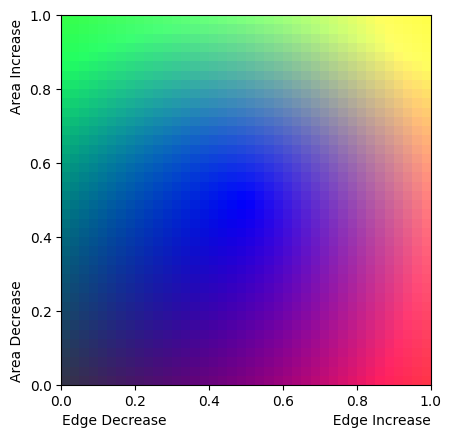

100%|████████████████████████████████████████████████████████████████████████████| 14000/14000 [07:39<00:00, 30.48it/s]


NameError: name 'edge_diff' is not defined

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
def custom_colormap(i, j, n):
    # Normalize the indices to the range [0, 1]
    x = i / (n - 1)
    y = j / (n - 1)
    
    # Compute the distance from the center
    distance = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)
    
    # Define the color components based on distance from center
    g = np.clip(distance + (x - 0.5), 0, 1)
    r = np.clip(distance + (y - 0.5), 0, 1)
    b = np.clip(1 - distance, 0, 1)
    
    return (r, g, b, 1)

# Create an array representing the custom colormap
bivariate_colors = np.empty((n, n, 4))  # Initialize an empty array to store RGBA values

# Loop over each position in the array
for i in range(n):
    for j in range(n):
        bivariate_colors[i, j] = custom_colormap(i, j, n)

# Display the bivariate color scheme
plt.imshow(bivariate_colors, origin='lower', extent=[0, 1, 0, 1])
plt.xlabel('Edge Decrease                                      Edge Increase')
plt.ylabel('Area Decrease                                      Area Increase')
plt.show()


# Create an empty array to store the RGB values
color_array = np.zeros((*area_diff_norm.shape, 4))

# Assign colors from your custom colormap
for x in tqdm(range(area_diff_norm.shape[0])):
    for y in range(area_diff_norm.shape[1]):
        if mask[x, y]:
            i = area_indices[x, y]
            j = edge_indices[x, y]
            color_array[x, y] = bivariate_colors[i, j]
        else:
            color_array[x, y] = [1.0,1.0,1.0,1.0]

left, bottom = edge_transform * (0, area_diff_norm.shape[0])
right, top = edge_transform * (area_diff_norm.shape[1], 0)

extent = [left, right, bottom, top]
print(extent)

In [13]:
del edge_diff, area_diff,area_diff_clipped,edge_diff_clipped
gc.collect()

[-180.0, 180.0, -60.0, 80.0]


In [14]:
import rasterio
from rasterio.transform import from_origin

# Update the transformation to account for the number of bands (color channels)
transform = from_origin(area_transform[2], area_transform[5], area_transform[0], area_transform[4])

color_array_file = 'G:/Hangkai/Global forest edge/001degree/color_array.tif'

# Save color_array as a TIFF file
with rasterio.open(
    color_array_file,
    'w',
    driver='GTiff',
    height=color_array.shape[0],
    width=color_array.shape[1],
    count=4,  # color_array has 4 bands (RGBA)
    dtype=color_array.dtype,
    crs=area_crs,
    transform=transform
) as dst:
    for k in range(color_array.shape[2]):
        dst.write(color_array[:, :, k], k + 1)

In [ ]:
"""
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.imshow(color_array, extent=extent, transform=ccrs.PlateCarree())  # 使用 ax.imshow 而不是 plt.imshow
ax.coastlines()
ax.set_title('Edge Dynamic with Area Dynamic', fontsize=15)  # 使用 ax.set_title 而不是 ax.set_label
ax.tick_params(labelsize=15)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, 
                  linewidth=0.5, color='gray', alpha=0.5, 
                  xlocs=[-120, 0, 120],  # Adjust for desired longitude spacing
                  ylocs=[-90, -45, 0, 45, 90])
# Adjust the font size of the labels.
labels = gl.xlabel_style
labels['size'] = 10  # Change to desired size.
gl.xlabel_style = labels

labels = gl.ylabel_style
labels['size'] = 10  # Change to desired size.
gl.ylabel_style = labels
plt.show()
"""

In [ ]:
"""
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import numpy as np
plt.figure(dpi=500)

# 创建 GridSpec 对象
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

# 创建 GeoAxes 对象用于绘制地图
ax_map = plt.subplot(gs[0], projection=ccrs.PlateCarree())
ax_map.imshow(color_array, extent=extent, transform=ccrs.PlateCarree())
ax_map.coastlines(linewidth=0.5)
ax_map.set_title('Edge Dynamic with Area Dynamic', fontsize=10)
ax_map.tick_params(labelsize=15)
gl = ax_map.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, 
                      linewidth=0, color='gray', alpha=0.5, 
                      xlocs=[-120, 0, 120],  # Adjust for desired longitude spacing
                      ylocs=[-90, -45, 0, 45, 90])
labels = gl.xlabel_style
labels['size'] = 8  # Change to desired size.
gl.xlabel_style = labels
labels = gl.ylabel_style
labels['size'] = 8  # Change to desired size.
gl.ylabel_style = labels

# 创建 Axes 对象用于绘制颜色图
ax_cmap = plt.subplot(gs[1])
cmap_image = ax_cmap.imshow(bivariate_colors, origin='lower', extent=[0, 1, 0, 1])

ax_cmap.axis('off')
ax_cmap.text(0.5, -0.2, '-20%                                                              ', fontsize=7, ha='center', transform=ax_cmap.transAxes, rotation=45)
ax_cmap.text(0.5, -0.1, 'Edge Diff', fontsize=7, ha='center', transform=ax_cmap.transAxes)
ax_cmap.text(0.5, -0.1, '                                    +20%', fontsize=7, ha='center', transform=ax_cmap.transAxes)
ax_cmap.text(-0.1, 0.5, '                                    +20%', fontsize=7, va='center', rotation='vertical', transform=ax_cmap.transAxes)
ax_cmap.text(-0.1, 0.5, 'Area Diff', fontsize=7, va='center', rotation='vertical', transform=ax_cmap.transAxes)

# 调整图例的位置和大小
gs.tight_layout(plt.gcf())

plt.show()
"""

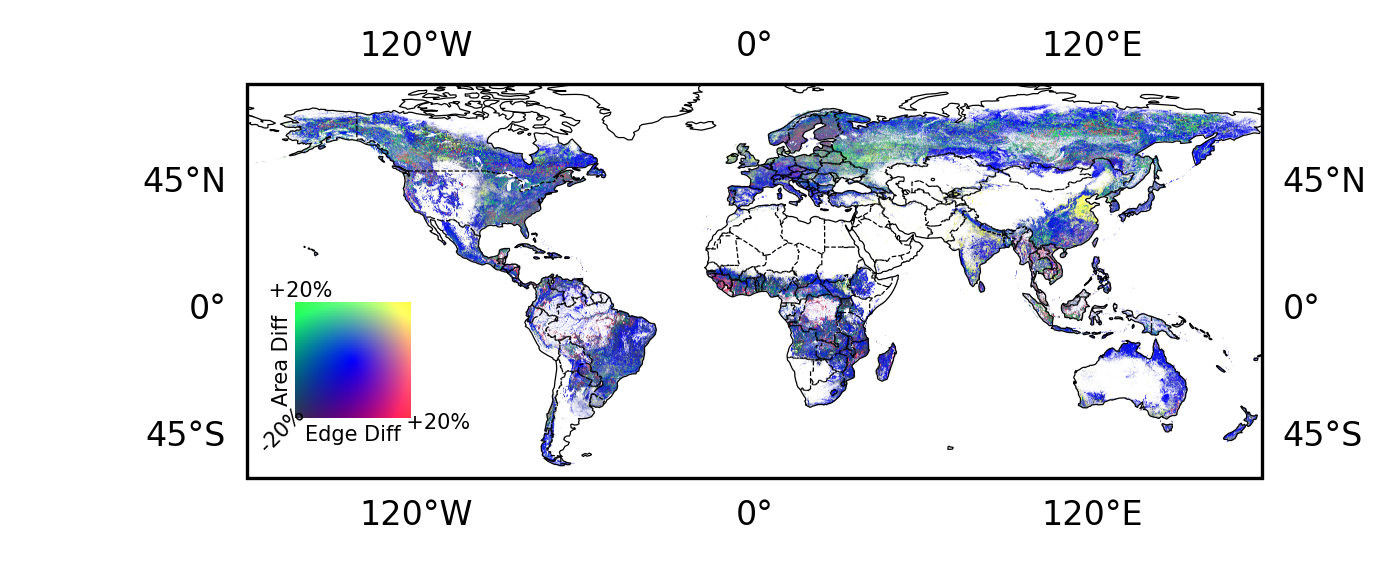

In [30]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import numpy as np
import cartopy.feature as cfeature
import rasterio

"""
color_array_file = 'G:/Hangkai/Global forest edge/001degree/color_array.tif'

with rasterio.open(color_array_file) as src:
    red_band = src.read(1)  # 读取红色通道
    green_band = src.read(2)  # 读取绿色通道
    blue_band = src.read(3)  # 读取蓝色通道
    alpha_band = src.read(4)  # 读取透明通道（alpha通道）

color_array = np.stack((red_band, green_band, blue_band, alpha_band), axis=-1)
del red_band, green_band,blue_band,alpha_band
gc.collect()

color_array_float32 = np.array(color_array, dtype=np.float32)
"""
del gs,ax_map
gc.collect()

plt.figure(dpi=100)

# Create a GridSpec object
gs = gridspec.GridSpec(1, 1, width_ratios=[3, 1])

#
ax_map = plt.subplot(gs[0], projection=ccrs.PlateCarree())
ax_map.imshow(color_array_float32, extent=extent, transform=ccrs.PlateCarree())
ax_map.coastlines(linewidth=0.3)
# ax_map.set_title('Edge Dynamic', fontsize=10)
ax_map.tick_params(labelsize=15)
gl = ax_map.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, 
                      linewidth=0, color='gray', alpha=0.5, 
                      xlocs=[-120, 0, 120],  # Adjust for desired longitude spacing
                      ylocs=[-90, -45, 0, 45, 90])
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')

ax_map.add_feature(countries, edgecolor='black', linestyle='--', linewidth = 0.3)

labels = gl.xlabel_style
labels['size'] = 8  # Change to desired size.
gl.xlabel_style = labels
labels = gl.ylabel_style
labels['size'] = 8  # Change to desired size.
gl.ylabel_style = labels

# Create Axes objects for color mapping
cmap_position = [0.14, 0.4, 0.08, 0.08]  # Adjust these values to position ax_cmap as desired

ax_cmap = plt.gcf().add_axes(cmap_position)
cmap_image = ax_cmap.imshow(bivariate_colors, origin='lower', extent=[0, 1, 0, 1])

camp_font_size = 5
ax_cmap.axis('off')
ax_cmap.text(0.5, -0.3, '-20%                              ',
             fontsize=camp_font_size, ha='center', transform=ax_cmap.transAxes, rotation=45)
ax_cmap.text(0.5, -0.2, 'Edge Diff', fontsize=camp_font_size, ha='center', transform=ax_cmap.transAxes)
ax_cmap.text(0.5, -0.1, '                          +20%', fontsize=camp_font_size, ha='center',
             transform=ax_cmap.transAxes)
ax_cmap.text(-2.3, 1.1, '                                    +20%', fontsize=camp_font_size, va='center',
            transform=ax_cmap.transAxes)
ax_cmap.text(-0.2, 0.5, 'Area Diff', fontsize=camp_font_size, va='center', rotation='vertical', transform=ax_cmap.transAxes)

# plt.show()
plt.savefig('output.tif', format='tiff', dpi=500)